In [2]:
import os
import pathlib

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:/Users/user/Desktop/final/mpg_raw.csv')

In [5]:
# Identify the dimension of dataset
df.shape

(398, 9)

In [6]:
# Identify the summary of dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
# Identify the structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
# To find the null values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [20]:
# To drop null values
df.dropna(inplace=True)

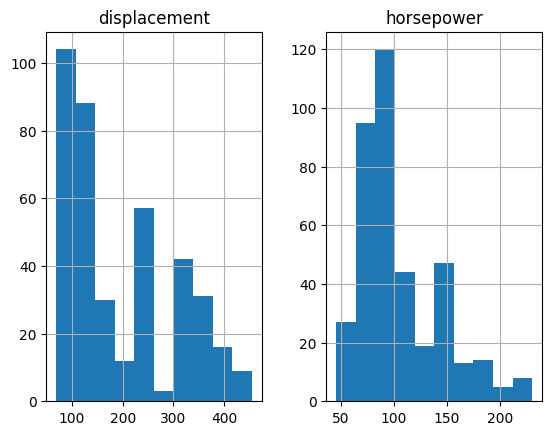

In [21]:
# To plot the histogram
df.hist(["displacement","horsepower"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7d07382c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7d079ea48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7d2b7f948>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7d2844848>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7d079e888>],
 'means': []}

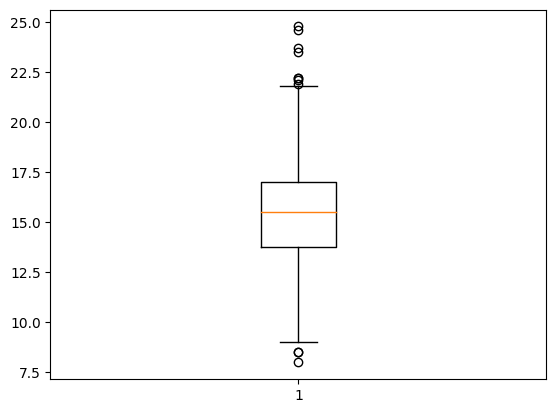

In [22]:
# Recognize the outliners using box plot
plt.boxplot(df['acceleration'])

In [23]:
# Create box plot for outliner treatment
Q1 = df['acceleration'].quantile(0.25)
Q3 = df['acceleration'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
print(lower, upper)

13.775000000000002
17.025
3.2499999999999964
8.900000000000007 21.89999999999999


In [31]:
# Create box plot for outliner treatment
Q1 = df['acceleration'].quantile(0.25)
Q3 = df['acceleration'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
print(lower, upper)

13.8
17.0
3.1999999999999993
9.000000000000002 21.799999999999997


{'whiskers': [<matplotlib.lines.Line2D at 0x1d7d4f95188>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7d6545b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7d4fc1408>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7d65620c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7d6545188>],
 'means': []}

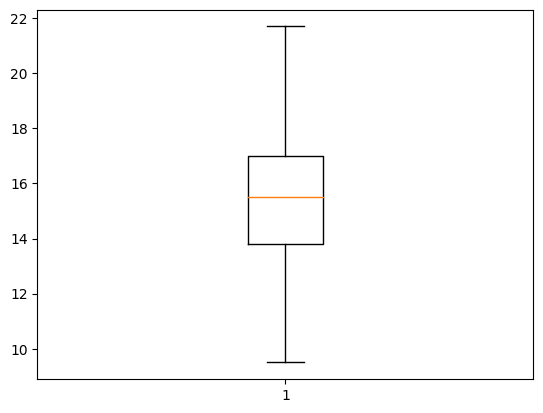

In [33]:
df = df[(df['acceleration'] >= lower) & (df['acceleration'] <= upper)]
plt.boxplot(df['acceleration'])

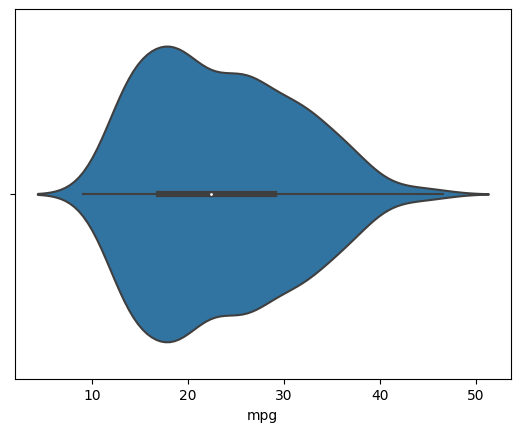

In [27]:
# Draw volin plot
sns.violinplot(data = df, x='mpg')
plt.show()

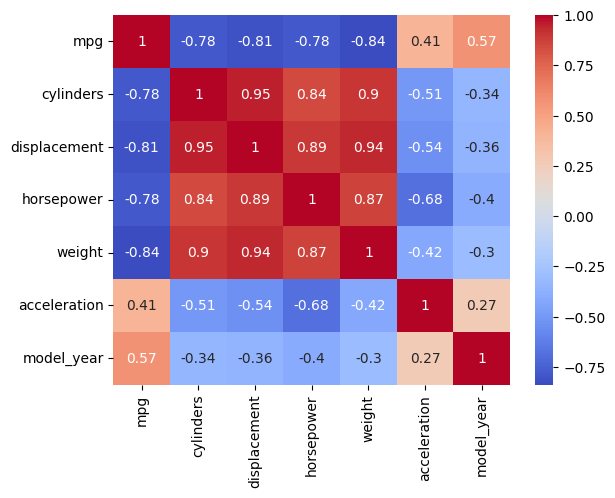

In [28]:
# Display heat map
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = "coolwarm")
plt.show()

In [29]:
# Standardise the contionous variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
con = df.select_dtypes(include=["int64", "float64"]).columns
standard = scaler.fit_transform(df[con])
print(standard)

[[-0.69933217  1.48959525  1.08609098 ...  0.61834371 -1.38577899
  -1.63658526]
 [-1.08815243  1.48959525  1.50070642 ...  0.84055308 -1.58726799
  -1.63658526]
 [-0.69933217  1.48959525  1.1921554  ...  0.53839537 -1.788757
  -1.63658526]
 ...
 [ 1.11516234 -0.86777044 -0.57237075 ... -0.80309079 -1.54697019
   1.63945143]
 [ 0.59673533 -0.86777044 -0.71700404 ... -0.41510619  1.27387591
   1.63945143]
 [ 0.98555559 -0.86777044 -0.72664626 ... -0.30341365  1.59625832
   1.63945143]]


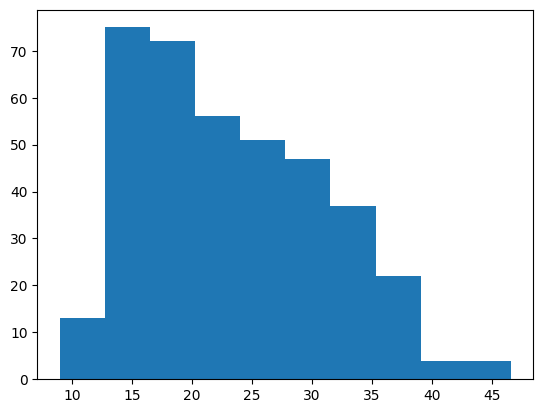

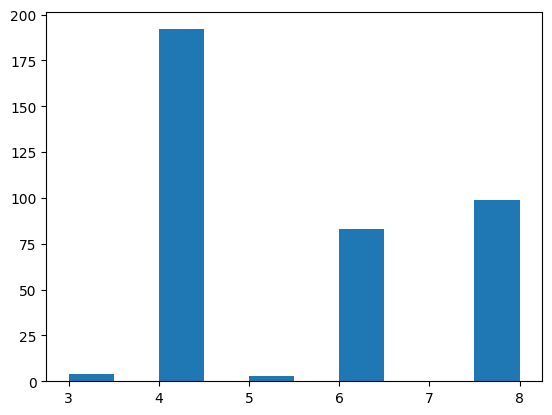

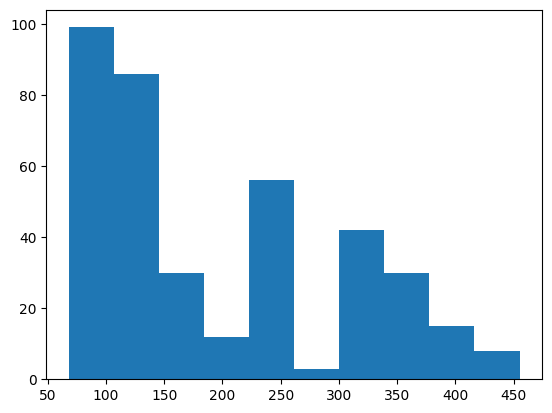

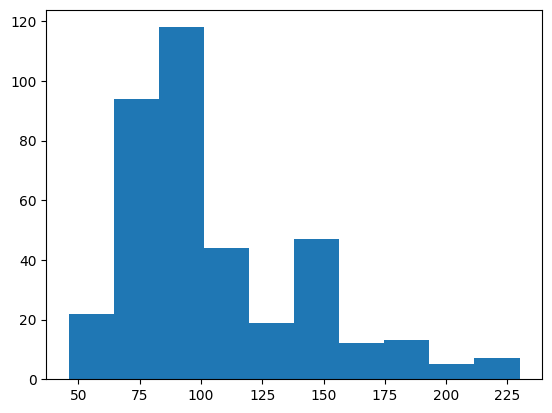

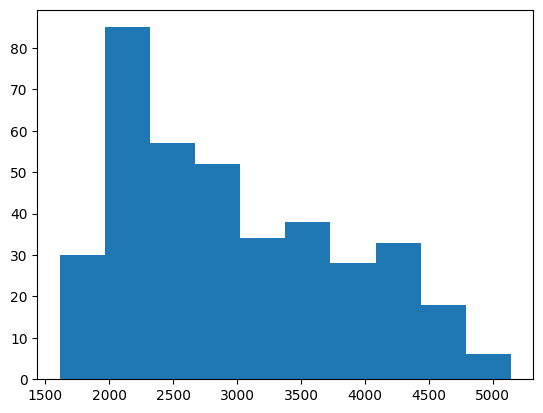

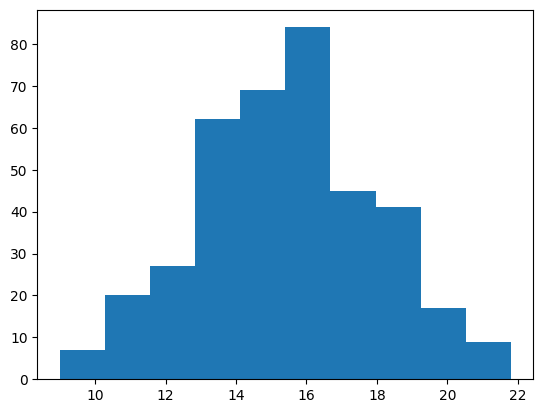

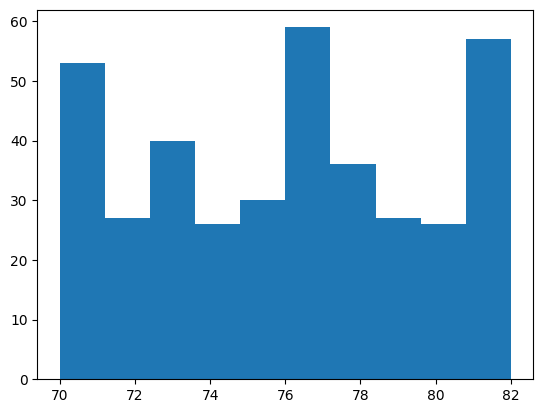

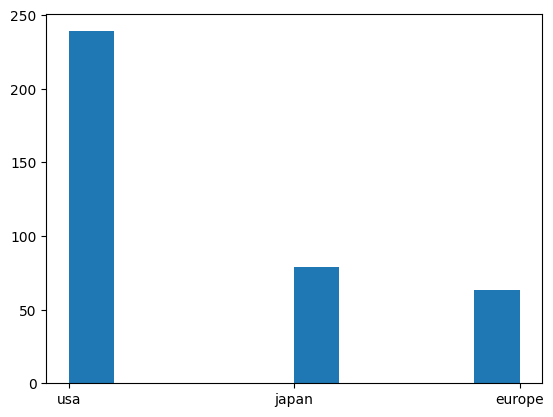

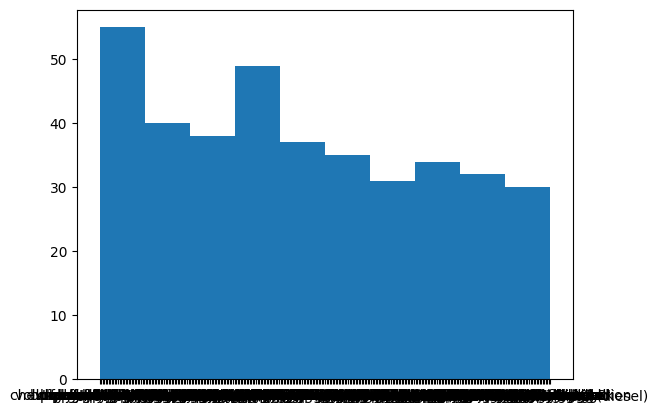

In [30]:
scales = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']
for i in scales:
    plt.hist(df[i])
    plt.show()

In [38]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [39]:
df.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [40]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64